# Clase 6: Métodos ensamblados

# Ensamble por votación (Clasificación)

Como inicio de este ejercicio tomemos una ilustración de la documentación de `scikit-learn`: [Plot the decision boundaries of a VotingClassifier](http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html). En ella se diagrama las fronteras de decisión de un modelo de ensamble por votación, usando dos de las cuatro características del [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set): largo del sépalo y largo del pétalo.

Este modelo por ensamble combina por votación las probabilidades de clase asignadas por tres clasificadores de base: un árbol de decisión (`DecisionTreeClassifier`), un modelo k-NN (`KNeighborsClassifier`), y una máquina de soporte vectorial con kernel gaussiano (`SVC`).

Se ha asignado manualmente a los modelos los pesos `[2, 1, 2]`, lo que significa que, al promediar las probabilidades obtenidas de los modelos, las probabilidades del DecisionTreeClassifier y de SVC cuentan el doble que las del modelo KNeighborsClassifier.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


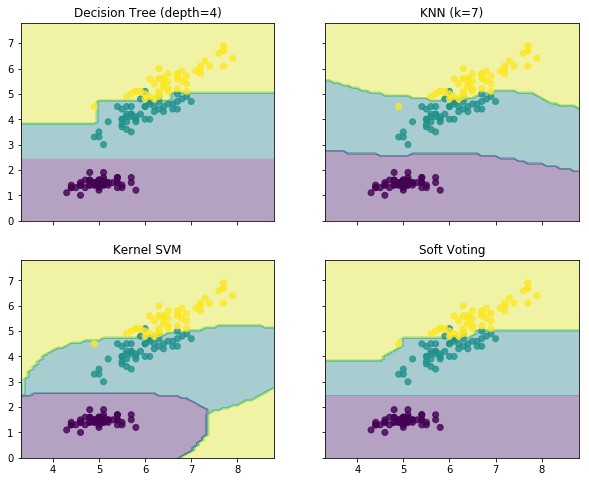

In [1]:
# Tomado de http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Evaluación del modelo de ensamble por votación 

Observemos la exactitud *(accuracy)* de cada uno los modelos:

In [2]:
print ("Exactitud del modelo de árbol de decisión     :", clf1.score(X, y))
print ("Exactitud del modelo de k-NN                  :", clf2.score(X, y))
print ("Exactitud del modelo SVM de kernel gaussiano  :", clf3.score(X, y))
print ("Exactitud del modelo de ensamble por votación :", eclf.score(X, y))


Exactitud del modelo de árbol de decisión     : 0.98
Exactitud del modelo de k-NN                  : 0.9666666666666667
Exactitud del modelo SVM de kernel gaussiano  : 0.96
Exactitud del modelo de ensamble por votación : 0.98


**Pregunta 1:** Dado que los modelos anteriores han sido entrenados en la totalidad de instancias del conjunto de datos Iris, ¿se puede decir que los valores anteriores son buenos indicadores del rendimiento esperado fuera de la muestra?

# Ensamble por votación (Regresión)

También se tiene este ejercicio de la documentación de `scikit-learn`: [Plot individual and voting regression predictions](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py). Se trata del [conjunto de datos de Boston](https://www.kaggle.com/heptapod/uci-ml-datasets), en donde se pretende predecir la variable medv (valor medio de viviendas ocupadas por sus propietarios en $ 1000s) 

El ensamblado combina por votación tres regresores ejemplares (GradientBoostingRegressor, RandomForestRegressor y LinearRegression) y se utilizan para inicializar un VotingRegressor.

Se ha asignado manualmente a los modelos los pesos `[2, 1, 2]`, lo que significa que, al promediar los valores obtenidos de los modelos, estos valores del GradientBoostingRegressor y LinearRegression cuentan el doble que las del modelo RandomForestRegressor.


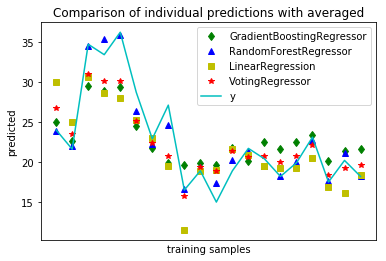

In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)], weights=[2, 1, 2])
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
ereg.fit(X, y)

xt = X[:20]

plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.plot(y[:20], 'c', label='y')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

## Evaluación del modelo de ensamble por votación 

Observemos el $R^{2}$ de cada uno los modelos:

In [4]:
print ("Coeficiente de determinación (R^2) del modelo de árbol de decisión     :", reg1.score(X, y))
print ("Coeficiente de determinación (R^2) del modelo de k-NN                  :", reg2.score(X, y))
print ("Coeficiente de determinación (R^2) del modelo SVM de kernel gaussiano  :", reg3.score(X, y))
print ("Coeficiente de determinación (R^2) del modelo de ensamble por votación :", ereg.score(X, y))

Coeficiente de determinación (R^2) del modelo de árbol de decisión     : 0.7667331984896124
Coeficiente de determinación (R^2) del modelo de k-NN                  : 0.9768703889136274
Coeficiente de determinación (R^2) del modelo SVM de kernel gaussiano  : 0.7406426641094095
Coeficiente de determinación (R^2) del modelo de ensamble por votación : 0.8643787267028222


# Stacking con Regresión logística (Clasificación)

En el ejemplo anterior, se asignó manualmente los pesos `[2, 1, 2]` a los modelos de base. Tratemos ahora de emplear las predicciones probabilísticas de los modelos de base para entrenar nuestro modelo de ensamble. Como algoritmo de aprendizaje usaremos la regresión logística.

Para tener una mejor evaluación, vamos a reservar 30% de los datos como conjunto de pruebas.

Asimismo, dado que el conjunto de datos es pequeño, usaremos validación cruzada para el entrenamiento del modelo de ensamble.

In [0]:
from sklearn.model_selection import train_test_split

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Partición del conjunto de datos
# El parámetro stratify nos permite asegurar que en la partición se conserve la proporción de muestras con la clase indicada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

**Pregunta 2:** ¿Cuántas instancias tiene el conjunto de prueba?

In [6]:
print('Número de instancias del conjunto de prueba :', len(y_test))  ## COMPLETAR...

Número de instancias del conjunto de prueba : 45


A continuación entrenaremos los modelos y juntaremos en un `DataFrame` de `pandas` las predicciones de los modelos de base para el conjunto de entrenamiento:

In [7]:
modelo1 = DecisionTreeClassifier(max_depth=4)
modelo2 = KNeighborsClassifier(n_neighbors=7)
modelo3 = SVC(kernel='rbf', probability=True)

modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
modelo3.fit(X_train, y_train)

predicciones_base_train = pd.concat([pd.DataFrame(modelo1.predict_proba(X_train)),
                             pd.DataFrame(modelo2.predict_proba(X_train)),
                             pd.DataFrame(modelo3.predict_proba(X_train))], 
                         axis=1)
predicciones_base_train.columns = ['dt-setosa', 'dt-virginica', 'dt-versicolor',
                            'knn-setosa', 'knn-virginica', 'knn-versicolor',
                            'svc-setosa', 'svc-virginica', 'svc-versicolor']

# Mostremos las predicciones de cada modelo para las primeras 10 instancias del conjunto de entrenamiento
predicciones_base_train.head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,dt-setosa,dt-virginica,dt-versicolor,knn-setosa,knn-virginica,knn-versicolor,svc-setosa,svc-virginica,svc-versicolor
0,0.0,0.166667,0.833333,0.0,0.142857,0.857143,0.011975,0.162084,0.825941
1,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.019497,0.058247,0.922256
2,0.0,0.166667,0.833333,0.0,0.142857,0.857143,0.012161,0.217723,0.770116
3,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.009457,0.961836,0.028707
4,0.0,0.000000,1.000000,0.0,0.142857,0.857143,0.014623,0.006243,0.979134
5,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.014915,0.024982,0.960103
6,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.012715,0.963630,0.023656
7,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.965468,0.016647,0.017885
8,0.0,0.166667,0.833333,0.0,0.571429,0.428571,0.012193,0.482375,0.505431
9,0.0,0.166667,0.833333,0.0,0.285714,0.714286,0.012752,0.243783,0.743465


**Pregunta 3:** En las predicciones de las 10 primeras instancias del conjunto de entrenamiento, ¿hay algún caso en el que dos o más clasificadores estén en desacuerdo sobre la clase más probable a asignar?

**Rpta.:** Sí, en la novena instancia. DT predice versicolor. k-NN y SVC predicen virginica.

**Pregunta 4:** ¿Cuál es la clase real de la novena instancia del conjunto de entrenamiento? (0 = setosa; 1 = virginica; 2 = versicolor)

In [8]:
y_train[8]

1

Usemos las predicciones de los modelos de base para entrenar nuestro modelo de ensamble. Emplearemos *grid search* con validación cruzada estratificada *10-fold* para determinar el mejor valor del parámetro de complejidad $C = 1/\lambda$ de nuestro modelo de regresión logística.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mejor_score = 0
mejor_C = None

for C in np.logspace(-2,4,13):  # ~ [0.01, 0.03, 0.1, ..., 10000] 
    ensamble = LogisticRegression(penalty='l2', C=C, random_state=0)
    scores_val = cross_val_score(ensamble, predicciones_base_train, y_train, cv=10)
    score_val_medio = np.mean(scores_val)  # Obtener la exactitud media de la validación cruzada en cada fold
    if score_val_medio > mejor_score: 
        mejor_score = score_val_medio
        mejor_C = C

# Habiendo obtenido el mejor C, ajustar el modelo con todo el conjunto de entrenamiento
ensamble = LogisticRegression(penalty='l2', C=mejor_C, random_state=0)
ensamble.fit(predicciones_base_train, y_train)

print ("Rendimiento en el conjunto de entrenamiento")
print ("-------------------------------------------")
print ("Exactitud del modelo de árbol de decisión                :", modelo1.score(X_train, y_train))
print ("Exactitud del modelo de k-NN                             :", modelo2.score(X_train, y_train))
print ("Exactitud del modelo SVM de kernel gaussiano             :", modelo3.score(X_train, y_train))
print ("Exactitud del modelo de ensamble por regresión logística :", ensamble.score(predicciones_base_train, y_train))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Rendimiento en el conjunto de entrenamiento
-------------------------------------------
Exactitud del modelo de árbol de decisión                : 0.9809523809523809
Exactitud del modelo de k-NN                             : 0.9619047619047619
Exactitud del modelo SVM de kernel gaussiano             : 0.9523809523809523
Exactitud del modelo de ensamble por regresión logística : 0.9809523809523809


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Calculemos el rendimiento en el conjunto de prueba:

In [10]:
predicciones_base_test = pd.concat([pd.DataFrame(modelo1.predict_proba(X_test)),
                             pd.DataFrame(modelo2.predict_proba(X_test)),
                             pd.DataFrame(modelo3.predict_proba(X_test))], 
                         axis=1)

print ("Rendimiento en el conjunto de prueba")
print ("------------------------------------")
print ("Exactitud del modelo de árbol de decisión                :", modelo1.score(X_test, y_test))  ## COMPLETAR...
print ("Exactitud del modelo de k-NN                             :", modelo2.score(X_test, y_test))  ## COMPLETAR...
print ("Exactitud del modelo SVM de kernel gaussiano             :", modelo3.score(X_test, y_test))  ## COMPLETAR...
print ("Exactitud del modelo de ensamble por regresión logística :", ensamble.score(predicciones_base_test, y_test))  ## COMPLETAR...



Rendimiento en el conjunto de prueba
------------------------------------
Exactitud del modelo de árbol de decisión                : 0.9777777777777777
Exactitud del modelo de k-NN                             : 0.9555555555555556
Exactitud del modelo SVM de kernel gaussiano             : 0.9555555555555556
Exactitud del modelo de ensamble por regresión logística : 0.9777777777777777


**Pregunta 5:** ¿Cuántas instancias fueron mal clasificadas por el modelo de ensamble en el conjunto de pruebas?

In [11]:
len(X_test) * (1 - ensamble.score(predicciones_base_test, y_test))

1.0000000000000013

# Stacking con Regresión lineal (Regresión)



Veamos ahora otra manera de construir un modelo de ensamblaje de Stacking. Utilizaremos la librería [mlxtend.regressor.StackingRegressor](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/), la cual complementa a skitlearn debido aque este último no cuenta con una implementación de Stacking propio.

Nuestro modelo ensamblado combinará los resultados de un LinearRegression, SVR(linear), Ridge Regression, Lasso Regression y finalmente se usará un SVR(RBF) como blender.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Loading some example data
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Initializing models

lr = LinearRegression()
gbr = GradientBoostingRegressor(random_state=1)
ridge = Ridge(random_state=1)
svr = SVR(kernel='rbf')
regressors = [gbr, ridge, svr]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=lr)

params = {'ridge__alpha': [0.1, 0.01],
          'svr__C': [0.1, 0.01],
          'svr__gamma': [0.1, 0.01],
          'gradientboostingregressor__n_estimators': [50,100]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.669935 using {'gradientboostingregressor__n_estimators': 100, 'ridge__alpha': 0.01, 'svr__C': 0.01, 'svr__gamma': 0.01}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
    if r > 10:
        break
print('...')

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.642 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.1, 'svr__C': 0.1, 'svr__gamma': 0.1}
0.649 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.1, 'svr__C': 0.1, 'svr__gamma': 0.01}
0.642 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.1, 'svr__C': 0.01, 'svr__gamma': 0.1}
0.649 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.1, 'svr__C': 0.01, 'svr__gamma': 0.01}
0.642 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.01, 'svr__C': 0.1, 'svr__gamma': 0.1}
0.650 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.01, 'svr__C': 0.1, 'svr__gamma': 0.01}
0.642 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.01, 'svr__C': 0.01, 'svr__gamma': 0.1}
0.650 +/- 0.09 {'gradientboostingregressor__n_estimators': 50, 'ridge__alpha': 0.01, 'svr__C': 0.01, 'svr__gamma': 0.01}
0.666 +/- 0.08 {'gradientboostingregressor__

In [14]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.4f"
      % np.mean((grid.predict(X) - y) ** 2))
print('Variance Score: %.4f' % grid.score(X, y))

Mean Squared Error: 1.9201
Variance Score: 0.9773


# Ensamble por Bagging con Random Forests

En esta parte del ejercicio usaremos el conjunto de datos [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). A partir de un conjunto de características sobre cada pasajero se requiere predecir si sobrevivió o no a la tragedia. Ver la [descripción de los datos](https://www.kaggle.com/c/titanic/data)

En los siguientes pasos tenemos un ejemplo básico del proceso típico de aprendizaje de modelos predictivos.

## Obtención y carga de datos

In [15]:
!mkdir titanic

mkdir: cannot create directory ‘titanic’: File exists


In [16]:
titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preparación de los datos

`Pandas` nos permite seleccionar una columna como índice. En nuestro caso el índice es conveniente hacer con la columna `PassengerId`.

In [18]:
titanic_train.set_index('PassengerId', inplace=True)
titanic_test.set_index('PassengerId', inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lidiando con los valores faltantes

Usando un simple conteo en el conjunto de entrenamiento, podemos verificar que falta algunos valores para `Embarked`, `Age` y sobre todo `Cabin`.

In [19]:
titanic_train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

En el conjunto de prueba, vemos que falta también un dato en `Fare`:

In [20]:
titanic_test.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

Hay diversas maneras de lidiar con valores faltantes. En este ejercicio haremos las siguientes opciones:

* `Embarked`: Sólo falta dos valores en el conjunto de entrenamiento. Imputaremos la moda (valor más frecuente). 

In [21]:
# Sólo hay dos valores faltantes NaN. La moda (valor más frecuente) es 'S'
titanic_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [22]:
# Registramos el índice (PassengerId) de los dos casos, y luego mostramos ambos registros
embarked_NaN = titanic_train[titanic_train['Embarked'].isnull()].index
titanic_train.loc[embarked_NaN]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [0]:
# Calculamos la moda
embarked_moda = titanic_train['Embarked'].mode()[0]

In [24]:
# Imputamos la moda en los valores faltantes
titanic_train.loc[embarked_NaN,'Embarked'] = embarked_moda
titanic_train.loc[embarked_NaN]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


* `Age`: Incluiremos un campo booleano de `EdadDesconocida` y adicionalmente completaremos el valor con la mediana.

In [0]:
# Creamos una columna para caracterizar los casos con edad desconocida
titanic_train['EdadDesconocida'] = titanic_train['Age'].isnull()
titanic_test['EdadDesconocida'] = titanic_test['Age'].isnull()

# Calculamos la mediana de Age y la imputamos en los valores faltantes de ambos conjuntos
# Mostramos cómo hacerlo con DataFrame.fillna()
age_mediana = titanic_train['Age'].median()
titanic_train['Age'].fillna(age_mediana, inplace=True)
titanic_test['Age'].fillna(age_mediana, inplace=True)

* `Fare`: Un solo caso, en el conjunto de prueba. Imputaremos la mediana del conjunto de entrenamiento.

In [0]:
fare_mediana = titanic_train['Fare'].median()
titanic_test['Fare'].fillna(fare_mediana, inplace=True)

* `Cabin`: No usaremos la clase `Cabin`, severamente incompleta.

In [0]:
titanic_train.drop(['Cabin'], axis=1, inplace=True)
titanic_test.drop(['Cabin'], axis=1, inplace=True)

### Selección de características

Ya hemos retirado la columna `Cabin`, severamente incompleta. Retiraremos también `Name` y `Ticket`.

In [0]:
titanic_train.drop(['Name','Ticket'], axis=1, inplace=True)
titanic_test.drop(['Name','Ticket'], axis=1, inplace=True)

Podemos añadir otras meta-características. Por ejemplo, podríamos crear una columna `ViajaSolo` cuando no el pasajero no viajó  con ningún familiar (`SibSp` y `Parch` con valor 0).

In [29]:
titanic_train['ViajaSolo'] = ((titanic_train['SibSp'] + titanic_train['Parch']) == 0)
titanic_test['ViajaSolo'] = ((titanic_test['SibSp'] + titanic_test['Parch']) == 0)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EdadDesconocida,ViajaSolo
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False,False
2,1,1,female,38.0,1,0,71.2833,C,False,False
3,1,3,female,26.0,0,0,7.9250,S,False,True
4,1,1,female,35.0,1,0,53.1000,S,False,False
5,0,3,male,35.0,0,0,8.0500,S,False,True


In [30]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EdadDesconocida,ViajaSolo
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,False,True
893,3,female,47.0,1,0,7.0000,S,False,False
894,2,male,62.0,0,0,9.6875,Q,False,True
895,3,male,27.0,0,0,8.6625,S,False,True
896,3,female,22.0,1,1,12.2875,S,False,False


Añade las columnas `MenorDeEdad` y `AdultoMayor`. Considera como menor de edad a todos aquellos menores de 18.0 años. Considera Adulto Mayor a los mayores de 55.0 años. Hazlo tanto en el conjunto de entrenamiento como en el de pruebas.

In [31]:
## COMPLETAR
titanic_train['MenorDeEdad'] = (titanic_train['Age'] < 18.0)
titanic_test['MenorDeEdad'] = (titanic_test['Age'] < 18.0)

titanic_train['AdultoMayor'] = (titanic_train['Age'] > 55.0)
titanic_test['AdultoMayor'] = (titanic_test['Age'] > 55.0)

titanic_train['MenorDeEdad'].value_counts()

False    778
True     113
Name: MenorDeEdad, dtype: int64

**Pregunta 6:** ¿Cuántos menores de edad hay en el conjunto de entrenamiento?

In [32]:
titanic_test['AdultoMayor'].value_counts()

False    399
True      19
Name: AdultoMayor, dtype: int64

**Pregunta 7:** ¿Cuántos adultos mayores hay en el conjunto de pruebas?

### Codificación de variables categóricas

Tenemos también tres variables categóricas (`Sex`, `Pclass` y `Embarked`).

* `Sex`: la podemos reemplazar por un valor binario `EsMujer`. 

In [0]:
titanic_train['EsMujer'] = (titanic_train['Sex'] == 'female')
titanic_test['EsMujer'] = (titanic_test['Sex'] == 'female')

titanic_train.drop(['Sex'], axis=1, inplace=True)
titanic_test.drop(['Sex'], axis=1, inplace=True)

* `Pclass` y `Embarked`: Usaremos *one-hot encoding* con la función `DataFrame.get_dummies` de `pandas`. Observa que `Pclass` es categórica no obstante esté siendo representada con una codificación numérica.

In [34]:
cols_categoricas = ['Pclass','Embarked']

titanic_train = pd.get_dummies(titanic_train, columns=cols_categoricas)
titanic_test = pd.get_dummies(titanic_test, columns=cols_categoricas)

titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,EdadDesconocida,ViajaSolo,MenorDeEdad,AdultoMayor,EsMujer,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,False,False,False,False,False,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,False,False,False,False,True,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,False,True,False,False,True,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,False,False,False,False,True,1,0,0,0,0,1
5,0,35.0,0,0,8.0500,False,True,False,False,False,0,0,1,0,0,1


In [35]:
titanic_test.head()

,Age,SibSp,Parch,Fare,EdadDesconocida,ViajaSolo,MenorDeEdad,AdultoMayor,EsMujer,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
892,34.5,0,0,7.8292,False,True,False,False,False,0,0,1,0,1,0
893,47.0,1,0,7.0000,False,False,False,False,True,0,0,1,0,0,1
894,62.0,0,0,9.6875,False,True,False,True,False,0,1,0,0,1,0
895,27.0,0,0,8.6625,False,True,False,False,False,0,0,1,0,0,1
896,22.0,1,1,12.2875,False,False,False,False,True,0,0,1,0,0,1


### Lidiar con datos desbalanceados

Tenemos un caso de datos desbalanceados. El número de muertos es claramente mayor que el de sobrevivientes:

In [36]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Hay diversas técnicas para lidiar con datos desbalanceados. Se puede leer más sobre eso en el artículo [He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263–1284. https://doi.org/10.1109/TKDE.2008.239](http://www.ele.uri.edu/faculty/he/PDFfiles/ImbalancedLearning.pdf)

En este ejercicio usaremos una aproximación llamada *random oversampling*, que consiste en duplicar ejemplos de la clase minoritaria hasta equilibrar el número de ejemplos por clase.

In [37]:
num_no_sobrevivientes = titanic_train['Survived'].value_counts()[0]
num_sobrevivientes = titanic_train['Survived'].value_counts()[1]

num_muestras = num_no_sobrevivientes - num_sobrevivientes
sobrevivientes = titanic_train[titanic_train['Survived'] == 1]
muestra_sobrevivientes = sobrevivientes.sample(n=num_muestras, random_state=0)

titanic_train_sample = titanic_train.append(muestra_sobrevivientes)

# Verificamos la distribución de la clase
titanic_train_sample['Survived'].value_counts()

1    549
0    549
Name: Survived, dtype: int64

## Separación de conjunto de validación

Antes de reservar un conjunto de validación, separemos la clase a predecir (`Survived`) del resto de variables.

In [0]:
X_train_val = titanic_train_sample.drop('Survived', axis=1)
y_train_val = titanic_train_sample['Survived']

Procedemos a separar un conjunto de validación.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


## Entrenamiento de Random Forests

El clasificador de Random Forest tiene diversos parámetros que pueden ser optimizados. Se puede ver la documentación de [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Nos limitaremos a identificar el número óptimo de modelos base *(estimators)* y revisar el comportamiento de la curva de aprendizaje y otras medidas de evaluación.

In [40]:
from sklearn.ensemble import RandomForestClassifier

mejor_score = 0
mejor_n_estimators = None
mejor_modelo_rf = None
rf_error_train = []
rf_error_val = []

n_estimators_grid = np.linspace(2,80,40).astype(int)  # ~ [2, 4, 6, ..., 80] 

for n_estimators in n_estimators_grid: 
    modelo_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    modelo_rf.fit(X_train, y_train)
    
    score_train = modelo_rf.score(X_train, y_train)
    rf_error_train.append(1 - score_train)
    
    score_val = modelo_rf.score(X_val, y_val)
    rf_error_val.append(1 - score_val)
    
    if score_val > mejor_score: 
        mejor_score = score_val
        mejor_n_estimators = n_estimators
        mejor_modelo_rf = modelo_rf

modelo_rf = mejor_modelo_rf
modelo_rf.fit(X_train, y_train)

print ("Mejor valor de n_estimators :", mejor_n_estimators)
print ("Exactitud de RandomForest en conjunto de entrenamiento :", modelo_rf.score(X_train, y_train))
print ("Exactitud de RandomForest en conjunto de validación    :", modelo_rf.score(X_val, y_val))

Mejor valor de n_estimators : 6
Exactitud de RandomForest en conjunto de entrenamiento : 0.969248291571754
Exactitud de RandomForest en conjunto de validación    : 0.8454545454545455


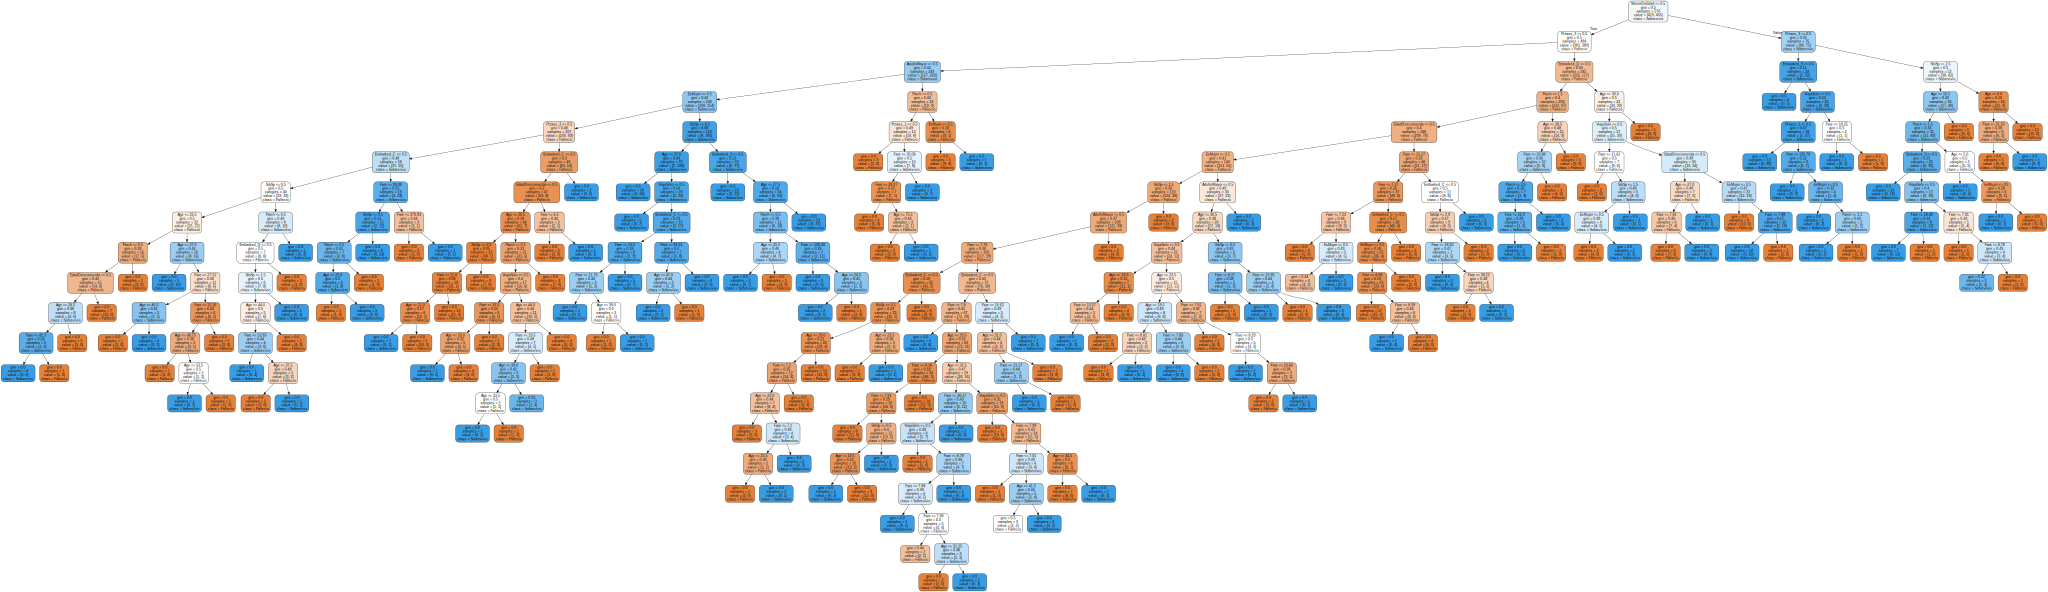

In [42]:
import pydotplus
import graphviz

# Extract single tree
estimator = modelo_rf.estimators_[2]

from sklearn.tree import export_graphviz

dot_data = export_graphviz(estimator, out_file=None, 
                feature_names = X_train.columns,
                class_names = ['Fallecio','Sobrevivio'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"50,50!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

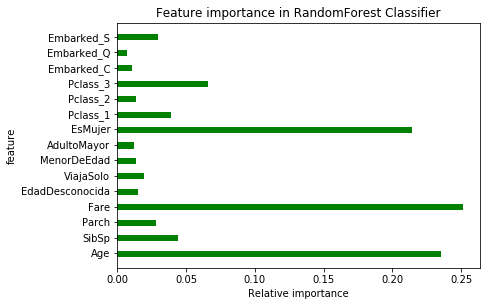

<Figure size 360x360 with 0 Axes>

In [43]:
col = X_train.columns
y = modelo_rf.feature_importances_

fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Curva de aprendizaje por número de modelos base

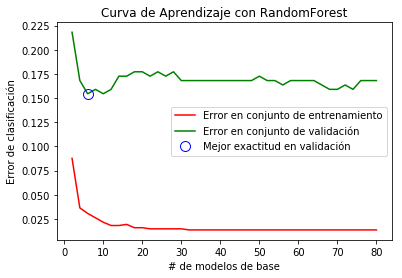

In [44]:
plt.figure()
plt.plot(n_estimators_grid, rf_error_train,
        label='Error en conjunto de entrenamiento',
        color='red')
plt.plot(n_estimators_grid, rf_error_val,
        label='Error en conjunto de validación',
        color='green')
plt.plot(mejor_n_estimators, 1-mejor_score, 'o', markersize=10,
         label="Mejor exactitud en validación", fillstyle="none", c='b', mew=1)
plt.xlabel("# de modelos de base")
plt.ylabel("Error de clasificación")
plt.title("Curva de Aprendizaje con RandomForest")
plt.legend(loc=0, numpoints=1)
plt.show()

Recuerda que el sobreajuste se da cuando las mejoras en los resultados del conjunto de entrenamiento no se corresponden con mejoras fuera del conjunto de entrenamiento.

**Pregunta 8** ¿Cuál de las siguientes afirmaciones representa mejor la curva visualizada?

* El modelo tiene severo overfitting de inicio a fin.
* El modelo muestra overfitting moderado desde que el número de modelos de base es mayor a 6, pero luego mantiene un rendimiento estable en el conjunto de validación.
* El modelo no presenta overfitting.
* Las curvas de aprendizaje de entrenamiento y validación son paralelas.


### Matriz de confusión

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

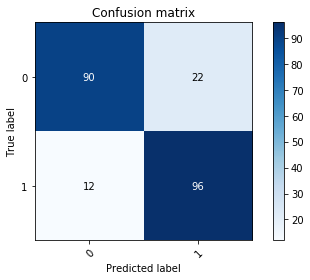

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Plot non-normalized confusion matrix

y_pred = modelo_rf.predict(X_val)

plot_confusion_matrix(y_val, y_pred, classes=[0,1],
                      title='Confusion matrix')

### Curva ROC

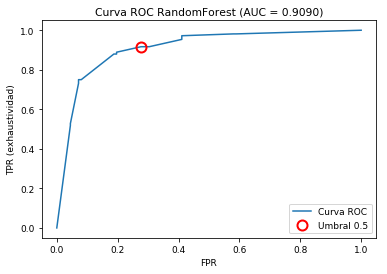

In [47]:
from sklearn import metrics

y_pred_val = modelo_rf.predict_proba(X_val)[:,1]
fpr, tpr, umbrales = metrics.roc_curve(y_val, y_pred_val)
auc_roc = metrics.roc_auc_score(y_val, y_pred_val)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC RandomForest (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc=4, numpoints=1)

# Ensamble con XGboost

AdaBoost trabaja mejor con modelos base de aprendizaje débil *(weak learners)*. Por defecto utiliza árboles de decisión de profundidad 1 *(decision stumps)*. Tiene también diversos parámetros que pueden ser optimizados. Se puede ver la documentación de [sklearn.ensemble.AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Los principales parámetros a optimizar son el número de modelos de base (`n_estimators`) y los parámetros propios del modelo de base.

Nos limitaremos a identificar el valor óptimo de `min_samples_leaf` del modelo base elegido (`DecisionTreeClassifier`)

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators=200
#min_samples_leaf_grid = np.linspace(1,10,10).astype(int) 

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [49]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='accuracy', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

random_search.fit(X_train,y_train)

print ("Mejores parametros :", random_search.best_params_)
print ("Exactitud de XGBoost en conjunto de entrenamiento :", random_search.score(X_train, y_train))
print ("Exactitud de XGBoost en conjunto de validación    :", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    8.6s finished


Mejores parametros : {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
Exactitud de XGBoost en conjunto de entrenamiento : 0.9009111617312073
Exactitud de XGBoost en conjunto de validación    : 0.835990888382688


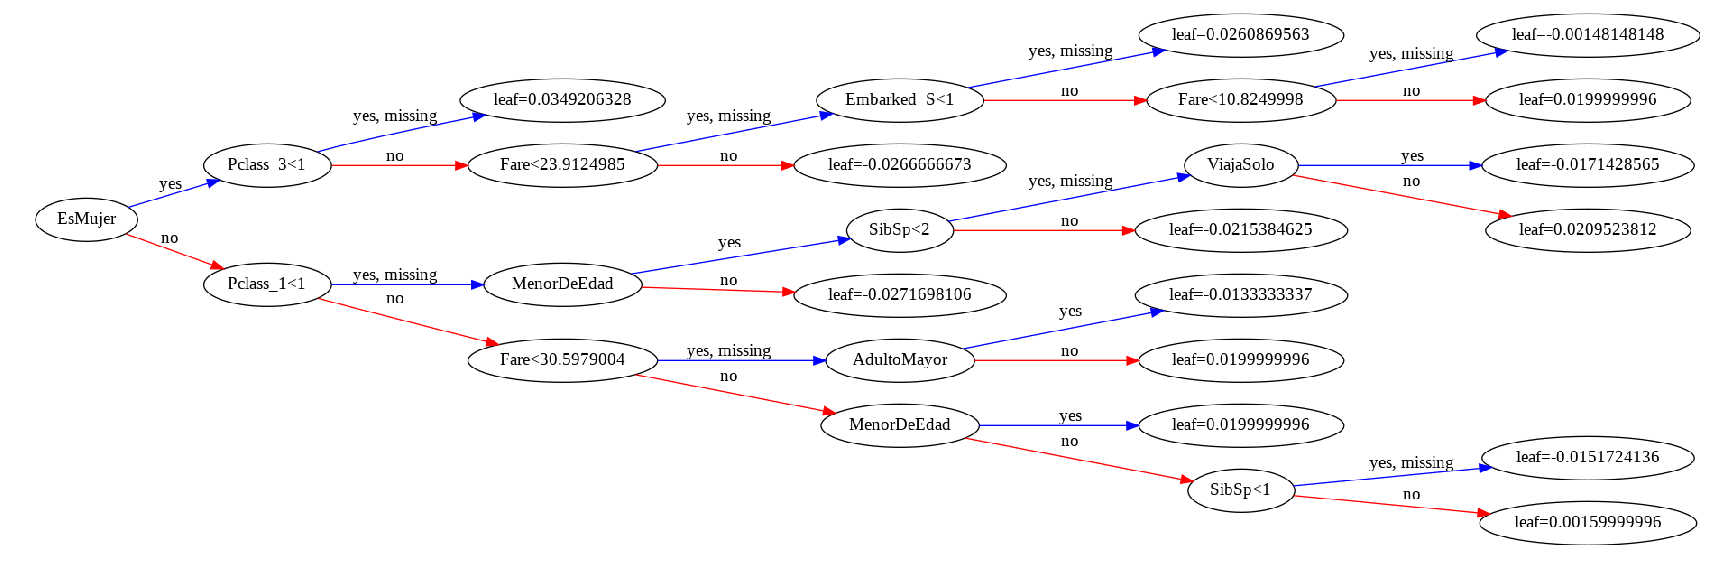

In [50]:
from xgboost import plot_tree, plot_importance
from matplotlib.pylab import rcParams

best_model = random_search.best_estimator_

##set up the parameters
rcParams['figure.figsize'] = 30,10
plot_tree(best_model,num_trees=0, rankdir='LR')


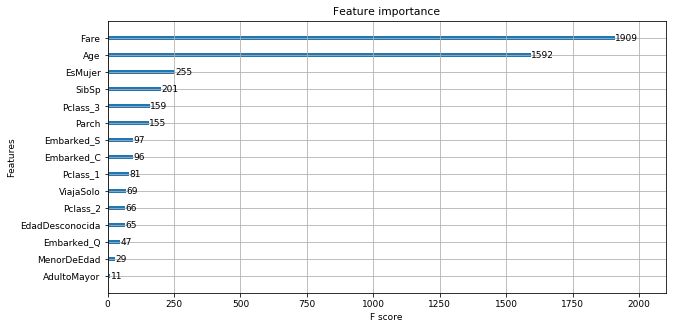

In [51]:
rcParams['figure.figsize'] = 10,5
plot_importance(best_model)

### Curva de aprendizaje por número de modelos base

La implementación del `AdaBoostClassifier` incluye la posibilidad de hacer predicciones y calcular el rendimiento del modelo en cada iteración, conforme se va añadiendo al ensamble más modelos de base. Usaremos el método [`staged_score`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier.staged_score) para trazar la curva de aprendizaje.

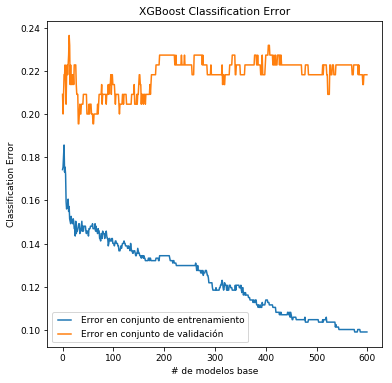

In [52]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# fit model no training data
model = best_model
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

# make predictions for test data
y_pred = model.predict(X_val)
predictions = [round(value) for value in y_pred]

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)


# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['error'], label='Error en conjunto de entrenamiento')
ax.plot(x_axis, results['validation_1']['error'], label='Error en conjunto de validación')
plt.legend(loc=0, numpoints=2)

pyplot.xlabel('# de modelos base')
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

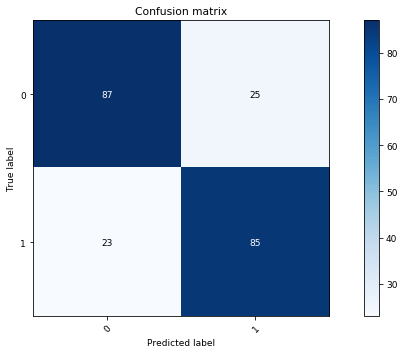

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val, y_pred, classes=[0,1],
                      title='Confusion matrix')


**Pregunta 9:** ¿Cuál de las siguientes afirmaciones representa mejor la curva visualizada?

* El modelo tiene severo overfitting de inicio a fin.
* El modelo obtiene rápidamente su mejor exactitud de validación, pero luego continúa un comportamiento en el que no se observa overfitting. Tal vez este punto no deba ser tomado demasiado en serio.
* El error de entrenamiento es cercano al de validación.


### Curva ROC

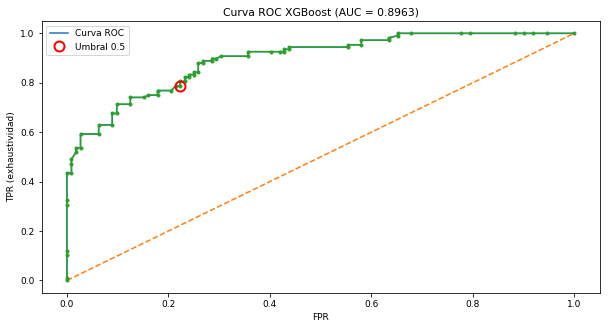

In [55]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = best_model.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_val, probs)
fpr, tpr, umbrales = metrics.roc_curve(y_val, probs)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, probs)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC XGBoost (AUC = %.4f)" % auc))
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

**Pregunta 10:** Prueba libremente a mejorar alguno de estos modelos o, si deseas, usa algún otro modelo de ensamble como [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html) o [Catboost](https://catboost.ai/docs/concepts/python-reference_apply_catboost_model.html). Reporta el error de clasificación, matriz de confusión, área bajo la curva ROC de tu mejor modelo en el conjunto de validación y explica tus resultados. Sugerencia: utilizar indicadores de evaluación (accuracy, precision, recall, etc)